In [1]:
import nibabel as nib
import numpy as np
import os
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

In [2]:
split = 'ASNR-MICCAI-BraTS2023-GLI-Challenge-TrainingData'
patient = 'BraTS-GLI-00000-000'
base_path = os.path.join('data', split, patient)


In [3]:
t1_data = nib.load(os.path.join(base_path, "BraTS-GLI-00000-000-t1n.nii.gz")).get_fdata()
t1ce_data = nib.load(os.path.join(base_path, "BraTS-GLI-00000-000-t1c.nii.gz")).get_fdata()
t2_data = nib.load(os.path.join(base_path, "BraTS-GLI-00000-000-t2w.nii.gz")).get_fdata()
flair_data = nib.load(os.path.join(base_path, "BraTS-GLI-00000-000-t2f.nii.gz")).get_fdata()
segment = nib.load(os.path.join(base_path, "BraTS-GLI-00000-000-seg.nii.gz")).get_fdata()

print(t1_data.shape, t1ce_data.shape, t2_data.shape, flair_data.shape, segment.shape)

(240, 240, 155) (240, 240, 155) (240, 240, 155) (240, 240, 155) (240, 240, 155)


In [4]:
mri_input = np.stack([t1_data, t1ce_data, t2_data, flair_data], axis=0)
print(mri_input.shape)

(4, 240, 240, 155)


In [5]:
mri_input = (mri_input - mri_input.mean()) / mri_input.std()

In [6]:
slice_idx = t1_data.shape[2] // 2

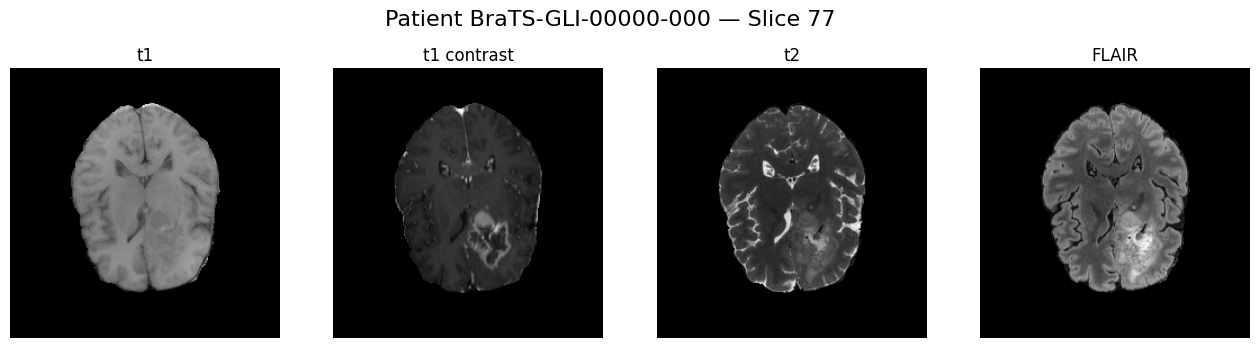

In [7]:
fig, axes = plt.subplots(1, 4, figsize=(16, 4))

axes[0].imshow(t1_data[:, :, slice_idx].T, cmap="gray", origin="lower")
axes[0].set_title("t1")
axes[0].axis("off")

axes[1].imshow(t1ce_data[:, :, slice_idx].T, cmap="gray", origin="lower")
axes[1].set_title("t1 contrast")
axes[1].axis("off")

axes[2].imshow(t2_data[:, :, slice_idx].T, cmap="gray", origin="lower")
axes[2].set_title("t2")
axes[2].axis("off")

axes[3].imshow(flair_data[:, :, slice_idx].T, cmap="gray", origin="lower")
axes[3].set_title("FLAIR")
axes[3].axis("off")

plt.suptitle(f"Patient {patient} — Slice {slice_idx}", fontsize=16)
plt.show()

In [8]:
print(segment.shape)
values, counts = np.unique(segment[:,:,slice_idx], return_counts=True)
print(values, counts)

(240, 240, 155)
[0. 1. 2. 3.] [55692   462   523   923]


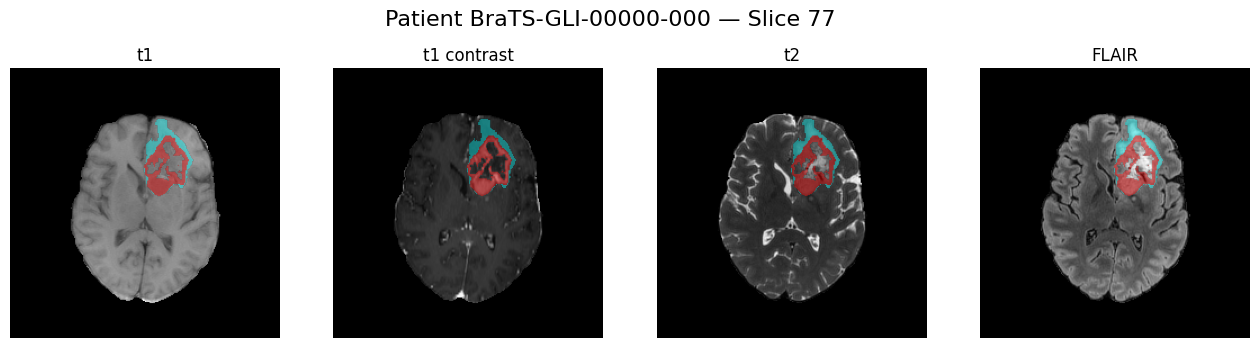

In [9]:
# 0=background, 1=NCR/NET, 2=Edema, 3=Enhancing Tumor
colors = ["none", "yellow", "cyan", "red"]
cmap = ListedColormap(colors)

mask = segment[:,:,slice_idx]
fig, axes = plt.subplots(1, 4, figsize=(16, 4))

axes[0].imshow(t1_data[:, :, slice_idx].T, cmap="gray", origin="lower")
axes[0].imshow(np.ma.masked_where(mask.T == 0, mask.T),
           cmap=cmap, alpha=0.4)  
axes[0].set_title("t1")
axes[0].axis("off")

axes[1].imshow(t1ce_data[:, :, slice_idx].T, cmap="gray", origin="lower")
axes[1].imshow(np.ma.masked_where(mask.T == 0, mask.T),
           cmap=cmap, alpha=0.4)  
axes[1].set_title("t1 contrast")
axes[1].axis("off")

axes[2].imshow(t2_data[:, :, slice_idx].T, cmap="gray", origin="lower")
axes[2].imshow(np.ma.masked_where(mask.T == 0, mask.T),
           cmap=cmap, alpha=0.4)  
axes[2].set_title("t2")
axes[2].axis("off")

axes[3].imshow(flair_data[:, :, slice_idx].T, cmap="gray", origin="lower")
axes[3].imshow(np.ma.masked_where(mask.T == 0, mask.T),
           cmap=cmap, alpha=0.4)  
axes[3].set_title("FLAIR")
axes[3].axis("off")

plt.suptitle(f"Patient {patient} — Slice {slice_idx}", fontsize=16)
plt.show()